
Random Forest Plots


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


In [2]:
print("Generating synthetic dataset...")
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=5,
    n_redundant=0,
    n_classes=2,
    random_state=42
)


print("Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize the RandomForestClassifier model
# We set 'n_estimators' to 100, which means the model will use 100 decision trees
print("Initializing and training the Random Forest model...")
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
print("Making predictions on the test set...")
y_pred = model.predict(X_test)



Generating synthetic dataset...
Splitting data into training and testing sets...
Initializing and training the Random Forest model...
Making predictions on the test set...


In [3]:
# --- Model Evaluation ---
# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

# Print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       104
           1       0.89      0.95      0.92        96

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200




Plotting feature importance...


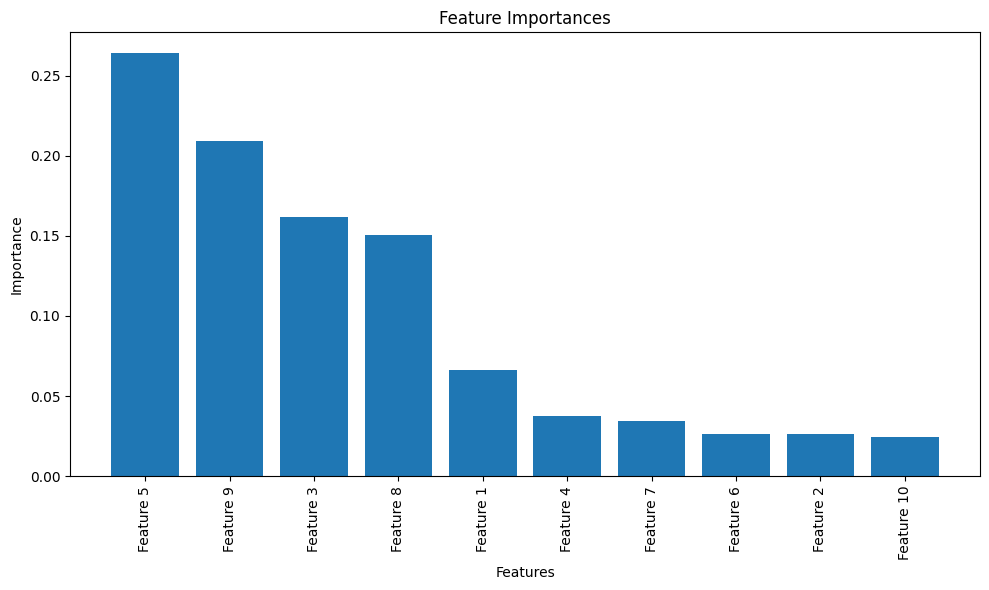

Plotting confusion matrix...


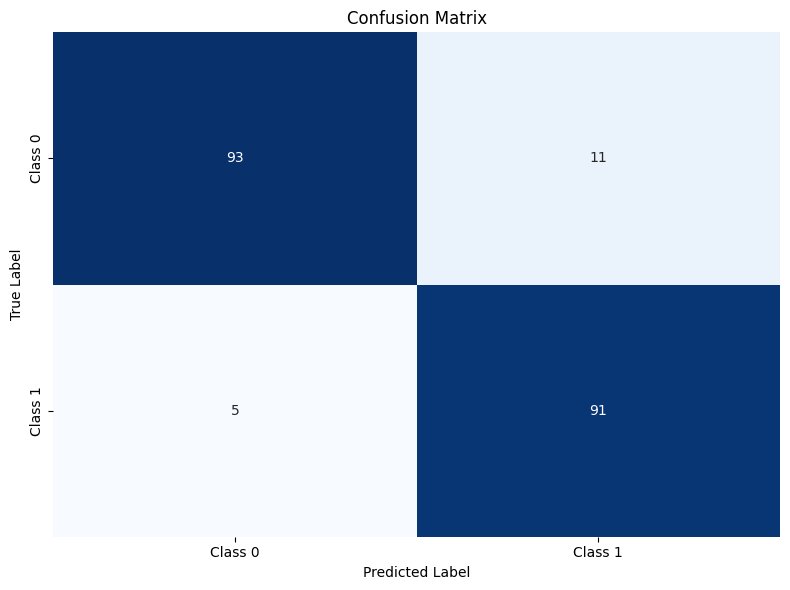


Script finished. The plots should now be visible.


In [4]:
# --- Plot 1: Feature Importance ---
# Random Forest models can provide a measure of how important each feature is
# in making predictions. We will plot this to see which features matter most.
print("\nPlotting feature importance...")
feature_importances = model.feature_importances_
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_names = [feature_names[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), sorted_importances, align="center")
plt.xticks(range(X.shape[1]), sorted_names, rotation=90)
plt.ylabel("Importance")
plt.xlabel("Features")
plt.tight_layout()
plt.show()


# --- Plot 2: Confusion Matrix ---
# A confusion matrix is a table that is often used to describe the performance
# of a classification model on a set of test data for which the true values are known.
print("Plotting confusion matrix...")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Class 0', 'Class 1'])
plt.yticks([0.5, 1.5], ['Class 0', 'Class 1'])
plt.tight_layout()
plt.show()

